In [1]:
# Importación módulos
import sys
import numpy as np
np.set_printoptions(threshold=10000)
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ruta1 =  '../imgpack/Landsat C/Landsat_C_04-11_R.png'
ruta2 =  '../imgpack/Landsat C/Landsat_C_05-11_NIR.png'

In [3]:
#Función nvdi
def ndvi(path_nir,path_r):
    np.seterr(divide='ignore', invalid='ignore')
    nir = cv.imread(path_nir,cv.IMREAD_GRAYSCALE)
    r= cv.imread(path_r,cv.IMREAD_GRAYSCALE)
    ndvi_res = np.zeros((r.shape[0],r.shape[1]),np.uint8)
    for x in range(nir.shape[0]):
        for y in range(nir.shape[1]):
            pix_r = r[x,y].astype(float)
            pix_nir = nir[x,y].astype(float)
            if (pix_r+pix_nir)!=0.0:
                var=(pix_nir-pix_r)/(pix_nir+pix_r)
                ndvi_res[x,y]= round((var+1)*127)
            else:
                ndvi_res[x,y]=0
                    
    return ndvi_res

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


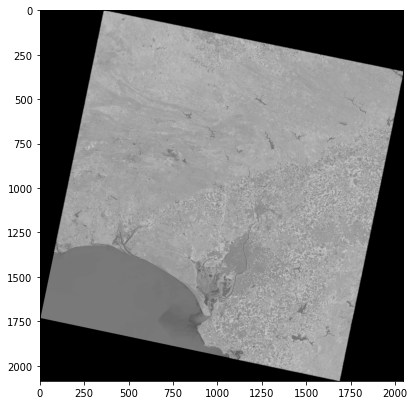

In [4]:
img_exp=ndvi(ruta2,ruta1)
#print(img_exp)
fig = plt.figure(figsize=(15, 15)) # Creamos nueva figura
fig.add_subplot(221)
plt.imshow(img_exp,cmap='gray')
plt.show()
    